# Module 2
## Module 2.1: Unit 3: Flow control
### Conditionals

#### Example: Heaviside function 

Consider an implementation of the [Heaviside step function](http://mathworld.wolfram.com/HeavisideStepFunction.html)

$$
\Theta(x) = \begin{cases}
  0 & x < 0 \\
  \frac{1}{2} & x = 0\\
  1 & x > 0
  \end{cases}
$$


In [1]:
x = float(input("x <- "))

theta = None
if x < 0:
    theta = 0
elif x == 0:
    theta = 0.5
else:
    theta = 1
    
print("theta({0}) = {1}".format(x, theta))

x <- 2
theta(2.0) = 1


#### Equality operator `==` 

In [2]:
3 == 3.0

True

In [3]:
"A" == "a"

False

In [4]:
0 == 0

True

In [5]:
"42" == 42

False

#### Comparison operators 

In [6]:
low = -2.3
high = 1000

In [7]:
low < high

True

In [8]:
low >= high

False

In [9]:
low == high

False

In [10]:
middle = 0

In [11]:
low < middle < high

True

In [12]:
low < middle > high

False

In [13]:
low < high > middle

True

In [14]:
low < middle <= 0 < high

True

Works also for strings

In [15]:
first = "aardvark"
last = "zebra"

In [16]:
first < last

True

In [17]:
first == "Aardvark"

False

In [18]:
first > "Aardvark"

True

... but why and how?

In [19]:
"a" > "A"

True

In [20]:
ord("a")

97

In [21]:
ord("A")

65

In [22]:
chr(65)

'A'

In [23]:
(65, 65) < (97, 65)

True

#### Boolean operators
* `and`
* `or`
* `not`

In [24]:
low < middle and middle < high

True

In [25]:
low < middle or middle == high

True

#### What is truth (in Python)? 

Stop and try the following code and figure out why the following expressions return `True` or `False`:

In [26]:
True

True

In [27]:
False

False

In [28]:
bool(True)

True

In [29]:
bool(False)

False

In [30]:
bool(0)

False

In [31]:
bool(1)

True

In [32]:
bool(2)

True

In [33]:
bool("True")

True

In [34]:
bool("true")

True

In [35]:
bool("False")

True

In [36]:
bool("")

False

In [37]:
bool(" ")

True

In [38]:
bool(None)

False

#### Identity operator 

**Warning**: Do not use `is` when testing for equality:

In [39]:
a = 256
b = 256

In [40]:
a is b

True

In [41]:
x = 257
y = 257

In [42]:
x is y

False

(see https://wsvincent.com/python-wat-integer-cache/ for more information and further links)

### Loops

#### `while` 

In [43]:
# countup.py

tmax = 10.
t, dt = 0, 2.

while t <= tmax:
   print("time " + str(t))
   t += dt
print("Finished")

time 0
time 2.0
time 4.0
time 6.0
time 8.0
time 10.0
Finished


Fibonacci series
$$
F_n = F_{n−1} + F_{n−2} \quad \text{with}\ F_1 = F_2 = 1
$$

In [44]:
# fibonacci.py

Fmax = 100
a, b = 0, 1

while b < Fmax:
   print(b, end=' ')
   a, b = b, a+b
print()

1 1 2 3 5 8 13 21 34 55 89 


##### Vertical throw

Throw a ball of mass $m$ vertically into the air from initial height $y_0 = 2$ m. What is its position $y(t)$ as a function of time $t$ and when does it hit the ground at $y=0$ if it has an initial upwards velocity $v_0 = 15\,\text{m/s}$ (a slow baseball pitch is $30\,\text{m/s}$)? 

Kinematic equation of motion:
$$
y(t) = -\frac{1}{2} g t^2 + v_0 t + y_0
$$

In [45]:
# parameters
g = 9.81  # acceleration due to gravity in m/s**2
v0 = 15   # initial velocity in m/s
y0 = 2    # initial position in m
y_ground = 0

dt = 0.1  # time step in s

# data containers
y_values = []
t_values = []

# initial conditions
y = y0
t = 0
while y > y_ground:
    y = -0.5*g*t**2 + v0*t + y0
    t_values.append(t)
    y_values.append(y)
    
    t += dt

In [46]:
y_values[-1]

-0.22720000000002472

In [47]:
t_values[-1]

3.2000000000000015

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

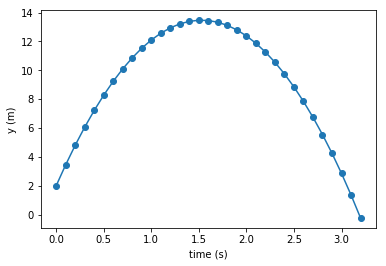

In [49]:
plt.plot(t_values, y_values, 'o-')
plt.xlabel("time (s)")
plt.ylabel("y (m)");

#### `for` loop 

Convert temperatures in Fahrenheit to Kelvin
$$
T/\text{K} = \frac{5}{9}(\theta/^\circ\text{F} - 32) + 273.15
$$

In [50]:
# temperature conversion

temperatures_F = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]
for theta in temperatures_F:
   T = (5/9) * (theta - 32)  + 273.15
   print(T)
   
print("Conversion complete")

288.76111111111106
298.8722222222222
310.26111111111106
309.31666666666666
311.65
316.4833333333333
Conversion complete


Store results:

In [51]:
temperatures_F = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]
temperatures_K = []
for theta in temperatures_F:
   T = (5/9) * (theta - 32)  + 273.15
   temperatures_K.append(T)
   
print(temperatures_K)

[288.76111111111106, 298.8722222222222, 310.26111111111106, 309.31666666666666, 311.65, 316.4833333333333]


Use `range()` to print side by side _after_ processing:

In [52]:
temperatures_F = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]
temperatures_K = []
for theta in temperatures_F:
   T = (theta - 32) * (5/9) + 273.15
   temperatures_K.append(T)
    
# print results side by side
for i in range(len(temperatures_F)):
    T_F = temperatures_F[i]
    T_K = temperatures_K[i]
    print("{0:.2f} F = {1:.2f} K".format(T_F, T_K))

60.10 F = 288.76 K
78.30 F = 298.87 K
98.80 F = 310.26 K
97.10 F = 309.32 K
101.30 F = 311.65 K
110.00 F = 316.48 K


#### Vertical throw example with `for` and `break`

Fixed number of steps with condition
- run `Nsteps` or stop when ball hits ground
- Kinematic equation of motion:
  $$
  y(t) = -\frac{1}{2} g t^2 + v_0 t + y_0
  $$

In [53]:
# parameters
g = 9.81  # acceleration due to gravity in m/s**2
v0 = 15   # initial velocity in m/s
y0 = 2    # initial position in m
y_ground = 0

dt = 0.1  # time step in s
Nsteps = 100

# data containers
y_values = []
t_values = []

# initial conditions
y = y0
t = 0

for i in range(Nsteps):
    t = i * dt
    y = -0.5*g*t**2 + v0*t + y0
    if y < y_ground:
        break
    y_values.append(y)
    t_values.append(t)
print("Computed", len(y_values), "positions")

Computed 32 positions


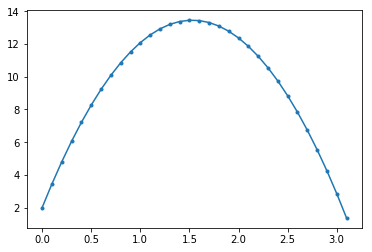

In [54]:
plt.plot(t_values, y_values, '.-')

## Module 2.2: Unit 4: Containers

*Data structures* are important for keeping track of data.
- organize many numbers
- Think of your key data structures *before* you start programming!

#### Examples in physics
  - vectors: $\mathbf{r} = \begin{pmatrix}x\\y\\z\end{pmatrix}$
  - matrices: $\mathsf{A} = \begin{pmatrix}
       A_{11} & A_{12} & A_{13}\\
       A_{21} & A_{22} & A_{23}
       \end{pmatrix}$
  - tensors: $\epsilon_{ijk}$

  

  - time series of measurements: $\big\{x(t_1), x(t_2), \dots, x(t_N)\big\}$
  - measurements at specific coordinates e.g., 
    - cartesian coordinate in space: $\rho(x,y,z)$
    - latitude/longitude on earth: $p(\phi, \theta)$

### Lists
Very versatile container (and for us the most important container)
* sequence
* ordered
* mutable

In [55]:
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]
stuff = ["dog", 42, -1.234, "cat", [3, 2, 1]]
empty = []
two = [[], []]

#### indexing 

In [56]:
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]

```
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]   elements
               |    |     |     |     |      |      |
               |  0 |   1 |   2 |   3 |    4 |    5 |   index
```

First element

In [57]:
temperatures[0]

60.1

Arbitrary elements

In [58]:
temperatures[3]

97.1

**Note**: Python indices are **0-based**.

```
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]   elements
               |    |     |     |     |      |      |
               |  0 |   1 |   2 |   3 |    4 |    5 |   index
```
For example, the third element is at index 2:

In [59]:
temperatures[2]

98.8

Negative indices count from the last element to the first:
```
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]   elements
               |    |     |     |     |      |      |
               |  0 |   1 |   2 |   3 |    4 |    5 |   index
               | -6 |  -5 |  -4 |  -3 |   -2 |   -1 |   neg.index

```

Last element

In [60]:
temperatures[-1]

110.0

Third element from end

In [61]:
temperatures[-3]

97.1

Python
[built-in function](https://docs.python.org/3.5/library/functions.html#built-in-functions)
to determine the *length of a list*:
[len()](https://docs.python.org/3.5/library/functions.html#len):

In [62]:
len(temperatures)

6

#### slicing
Slicing produces a new list by extracting a subset of elements as
determined by the "slice" _start:stop:step_. The general slicing syntax for a list `a`: 
```python
a[start:stop:step]
```
where 
- index `start` is *included* and 
- `stop` is *excluded*; 
- `start`, `stop`, `step` are each optional:
   - default for `start`: first element (index 0)
   - default for `stop`: after last element
   - default for `step` is 1, i.e., include every element. 

Negative values are also allowed for indices and negative step counts backwards.

First 3 elements:

```
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]   elements
               |    |     |     |     |      |      |
               |  0 |   1 |   2 |   3 |    4 |    5 |   index
               | -6 |  -5 |  -4 |  -3 |   -2 |   -1 |   neg.index

```

In [63]:
temperatures[0:3]

[60.1, 78.3, 98.8]

In [64]:
temperatures[:3]

[60.1, 78.3, 98.8]

(`start` defaults to 0 and can be omitted).

**`a[start:stop:step]`**

Omitting parameters
```python
temperatures[::2] == [60.1, 98.8, 101.3]
temperatures[2::2] == [98.8, 101.3]
temperatures[:2:2] == [60.1]
```

```
temperatures = [60.1, 78.3, 98.8, 97.1, 101.3, 110.0]   elements
               |    |     |     |     |      |      |
               |  0 |   1 |   2 |   3 |    4 |    5 |   index
               | -6 |  -5 |  -4 |  -3 |   -2 |   -1 |   neg.index

```

##### slicing example 

In [65]:
letters = ['A', 'B', 'C', 'D', 'E', 'F']

```
+---+---+---+---+---+---+
|'A'|'B'|'C'|'D'|'E'|'F'|  elements 
+---+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 4 | 5 |  index
+---+---+---+---+---+---+
|-6 |-5 |-4 |-3 |-2 |-1 |  index
+---+---+---+---+---+---+
```

```
+---+---+---+---+---+---+
|'A'|'B'|'C'|'D'|'E'|'F'|  elements 
+---+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 4 | 5 |  index
+---+---+---+---+---+---+
|-6 |-5 |-4 |-3 |-2 |-1 |  index
+---+---+---+---+---+---+
```

In [66]:
letters[:3]

['A', 'B', 'C']

In [67]:
letters[0:3]

['A', 'B', 'C']

In [68]:
letters[1:3]

['B', 'C']

```
+---+---+---+---+---+---+
|'A'|'B'|'C'|'D'|'E'|'F'|  elements 
+---+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 4 | 5 |  index
+---+---+---+---+---+---+
|-6 |-5 |-4 |-3 |-2 |-1 |  index
+---+---+---+---+---+---+
```

In [69]:
letters[-3]

'D'

In [70]:
letters[-3:-1]

['D', 'E']

In [71]:
letters[-3:]

['D', 'E', 'F']

In [72]:
letters[1::2]

['B', 'D', 'F']

#### Summary

```python
letters[:3] == ['A', 'B', 'C']
letters[0:3] == ['A', 'B', 'C']
letters[1:3] == ['B', 'C']
letters[-3] == 'D'
letters[-3:-1] == ['D', 'E']
letters[-3:] == ['D', 'E', 'F']
letters[1::2] == ['B', 'D', 'F']
```

```
+---+---+---+---+---+---+
|'A'|'B'|'C'|'D'|'E'|'F'|  elements 
+---+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 4 | 5 |  index
+---+---+---+---+---+---+
|-6 |-5 |-4 |-3 |-2 |-1 |  index
+---+---+---+---+---+---+
```

### Dictionaries

`dict` is a great data structure but used less often in numerical calculations.

We mostly use it to keep track of parameters, e.g. masses of elements:


In [73]:
masses = {
    "H": 1.0079,  "He": 4.002602,
    "Li": 6.94,   "Be": 9.0121831,
    "B": 10.81,   "C": 12.011,
    "N": 14.007,  "O": 15.999,
    "F": 18.998403163,
    "Ne": 20.1797,
}

Calculate the mass of the H$_2$O molecule:

In [74]:
m_water = 2*masses["H"] + 1*masses["O"]
print("Water mass", m_water, "u")

Water mass 18.0148 u


### Nested list example: 2D harmonic oscillator trajectory

A mass $m$ held by two perpendicular identical springs in the x-y plane ([2D harmonic oscillator](https://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node28.html)) moves in a potential
$$
U(x, y) = \frac{1}{2}k(x^2 + y^2)
$$
or with the vector $\mathbf{r} = (x,y)$ written as
$$
U(\mathbf{r}) = \frac{1}{2}k\mathbf{r}^2.
$$
Its trajectory (curve in space) $\mathbf{r}(t) = \big(x(t), y(t)\big)$ is 

\begin{align}
x(t) &= A \cos(\omega t)\\
y(t) &= B \cos(\omega t + \phi)
\end{align}

where the amplitudes $A$, $B$ and the phase difference $\phi$ are determined by the initial conditions, and the frequency is $\omega = \sqrt{k/m}$.

Given $A=1$, $B=2$, $\phi=\pi/4$ and $\omega=1$, calculate the trajectory $\mathbf{r}(t)$.

In [75]:
import math

# parameters
A = 1
B = 2
phi = math.pi/4
omega = 1

dt = 0.1
N = 100    # number of steps

r_values = []
for i in range(N):
    t = i*dt
    x = A*math.cos(omega*t)
    y = B*math.cos(omega*t + phi)
    r = [x, y]
    r_values.append(r)

`r_values` is a nested list with `N` entries:

In [76]:
len(r_values)

100

Each entry is a list of length 2, which is clear from looking at the first few elements:

In [77]:
r_values[:3]

[[1.0, 1.4142135623730951],
 [0.9950041652780257, 1.2659626133539166],
 [0.9800665778412416, 1.1050625843737085]]

We say that `r_values` 
* has 2 dimensions (one needs two indices to get at a value), e.g. `r_values[3][1]` to get the y-coordinate at time index 3.
* has length `N`
* has *shape* `N x 2`

Unpack the values from the `N x 2` list into two `N` lists (using *list comprehensions*): 

In [78]:
x_values = [r[0] for r in r_values]
y_values = [r[1] for r in r_values]

Load the *matplotlib* library for plotting and make images appear inline in the notebook:

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

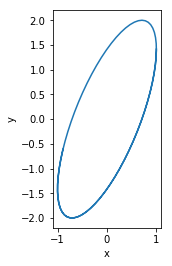

In [80]:
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect(1)

##### Alternative ways to unpack:

Unpack the two-element list as loop variables:

In [81]:
x_values = [x for x,y in r_values]
y_values = [y for x,y in r_values]

**Advanced (optional):** Very tricky use of the [zip()](https://docs.python.org/3/library/functions.html#zip) function and the [unpacking operator](https://docs.python.org/3/tutorial/controlflow.html#tut-unpacking-arguments) `*` :

In [82]:
x_values, y_values = zip(*r_values)

(Understanding how this works is left as a challenge. I am happy to give more hints if you ask in the forum.)

By the way: you can also use `zip` to "merge" the `x_values` and `y_values` back into a `Nx2` list, as demonstrated by looking at first few elements:

In [83]:
list(zip(x_values, y_values))[:3]

[(1.0, 1.4142135623730951),
 (0.9950041652780257, 1.2659626133539166),
 (0.9800665778412416, 1.1050625843737085)]

In [84]:
r_values[:3]

[[1.0, 1.4142135623730951],
 [0.9950041652780257, 1.2659626133539166],
 [0.9800665778412416, 1.1050625843737085]]